<a href="https://colab.research.google.com/github/sanha-hwang/OpenCV_practrice/blob/main/04.OpenCV_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%9D%B4%EC%A7%84%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# 이미지 이진화 (Image Thesholding)


## 기본 임계 처리
- 이진화 : 영상을 흑/백으로 분류하여 처리하는 것

  - 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제!
  
  - 임계값보다 크면 백, 작으면 흑이 되는데,  
    기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태

- 기본적으로 이미지의 segmenting의 가장 간단한 방법

- `cv2.threshold()`

  - Parameters  
    - `src` : input image로 single-channel 이미지.(grayscale 이미지)
    
    - `thresh` : 임계값

    - `maxval` : 임계값을 넘었을 때 적용할 value

    - `type` : thresholding type

  <br>

  - thresholding type
    - `cv2.THRESH_BINARY`  
      - src(x, y) > thresh 일 때, maxval

      - 그 외, 0

    - `cv2.THRESH_BINARY_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, maxval

    - `cv2.THRESH_TRUNC`
      - src(x, y) > thresh 일 때, thresh

      - 그 외, src(x, y)

    - `cv2.THRESH_TOZERO`
      - src(x, y) > thresh 일 때, src(x, y)

      - 그 외, 0

    - `cv2.THRESH_TOZERO_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, src(x, y)

In [ ]:
files.upload()

In [3]:
img = cv2.imread('letter.jpg')

In [4]:
img.shape

(426, 640, 3)

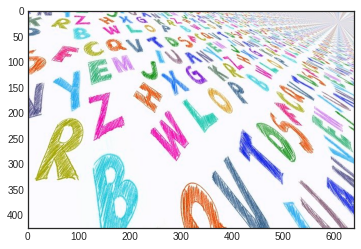

In [21]:
plt.imshow(img, cmap='gray')
plt.show()

In [11]:
ret, thresh1 = cv2.threshold(img, 128 ,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 128 ,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 128 ,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 128 ,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 128 ,255, cv2.THRESH_TOZERO_INV)


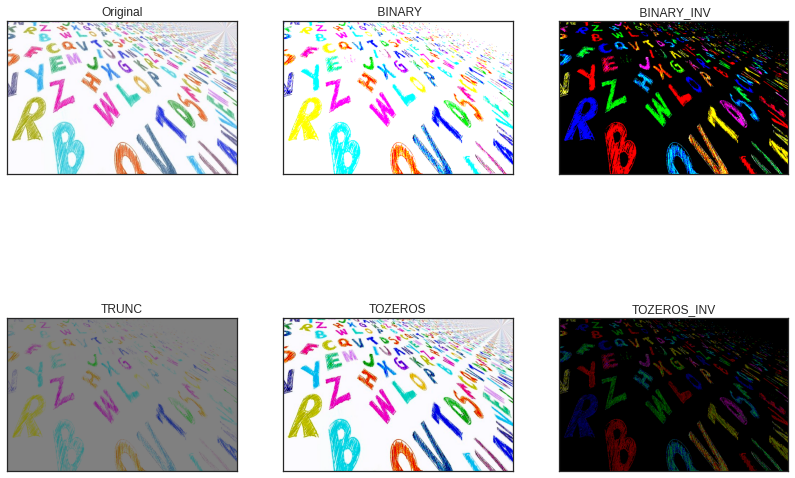

In [19]:
titles = ['Original', ' BINARY', ' BINARY_INV', 'TRUNC','TOZEROS', 'TOZEROS_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(14,10))
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
files.upload()

In [23]:
img2 = cv2.imread('snow.jpg')

In [24]:
ret, thresh1 = cv2.threshold(img2, 128 ,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img2, 128 ,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img2, 128 ,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img2, 128 ,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img2, 128 ,255, cv2.THRESH_TOZERO_INV)


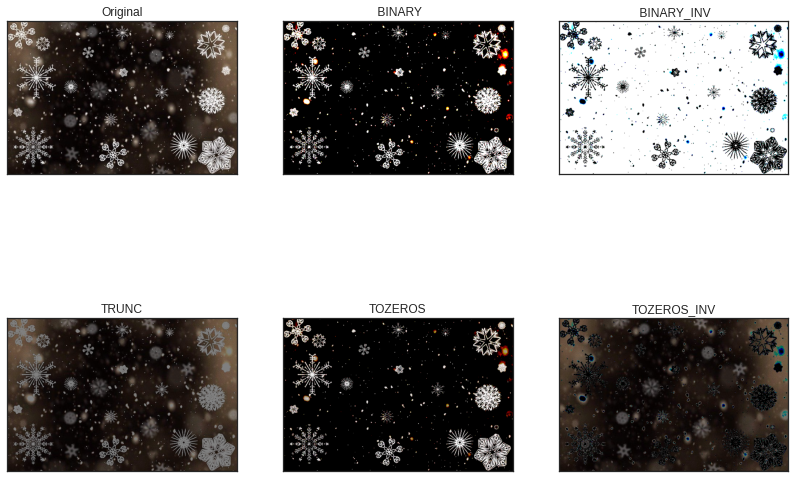

In [25]:
titles = ['Original', ' BINARY', ' BINARY_INV', 'TRUNC','TOZEROS', 'TOZEROS_INV']
images = [img2, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(14,10))
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

## 적응 임계처리

- 이전 단계에서는 임계값을 이미지 전체에 적용하여 처리하기 때문에  
  하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 됨

- 이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding

- `cv2.adaptiveThreshold()`

  - Parameters  
    - `src` : grayscale image

    - `maxValue` : 임계값

    - `adaptiveMethod` : thresholding value를 결정하는 계산 방법

    - `thresholdType` : threshold type

    - `blockSize` : thresholding을 적용할 영역 사이즈

    - `C` : 평균이나 가중평균에서 차감할 값

  <br>
  
  - Adaptive Method
    - `cv2.ADAPTIVE_THRESH_MEAN_C` : 주변영역의 평균값으로 결정

    - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : 주변영역의 가우시안 값으로 결정


In [34]:
img = cv2.imread('./letter.jpg', 0)

In [35]:
ret, th1 = cv2.threshold(img, 128 ,255, cv2.THRESH_BINARY)


In [36]:
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

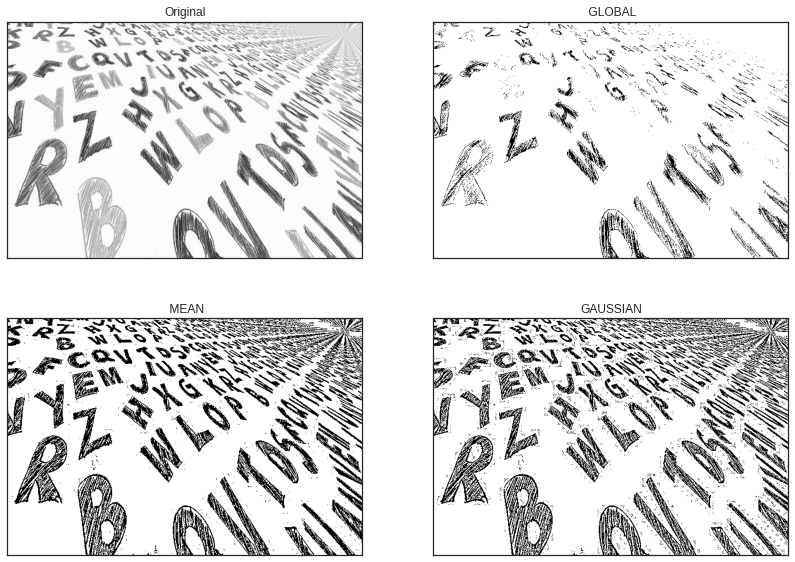

In [37]:
titles = ['Original', ' GLOBAL', ' MEAN', 'GAUSSIAN']
images = [img, th1, th2, th3]

plt.figure(figsize=(14,10))
for i in range(4):
  plt.subplot(2,2, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

## Otsu의 이진화
- `Otsu의 이진화`(Otsu’s Binarization)란 bimodal image에서 임계값을 자동으로 계산하는 것

- 임계값을 결정하는 가장 일반적인 방법은 trial and error 방식

- bimodal image (히스토그램으로 분석하면 2개의 peak가 있는 이미지)의 경우는 히스토그램에서 임계값을 어느정도 정확히 계산 가능

- `cv2.threshold()` 함수의 flag에 추가로 `cv2.THRESH_OTSU` 를 적용.
  이때 임계값은 0으로 전달

In [ ]:
files.upload()

In [41]:
img = cv2.imread('./star_n.jpg', 0)

In [42]:
img.shape

(360, 640)

In [51]:
ret1, th1 = cv2.threshold(img, 127 ,255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 0 ,255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(img, (5,5), 0)
ret3, th3 = cv2.threshold(blur, 0 ,255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)




In [52]:
image = [ img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Image', 'Histogram','Global Thresholding',
          'Original Image', 'Histogram','OTSU\'s Thresholding',
          'Gaussian filtered Image', 'Histogram','OTSU\'s Thresholding']

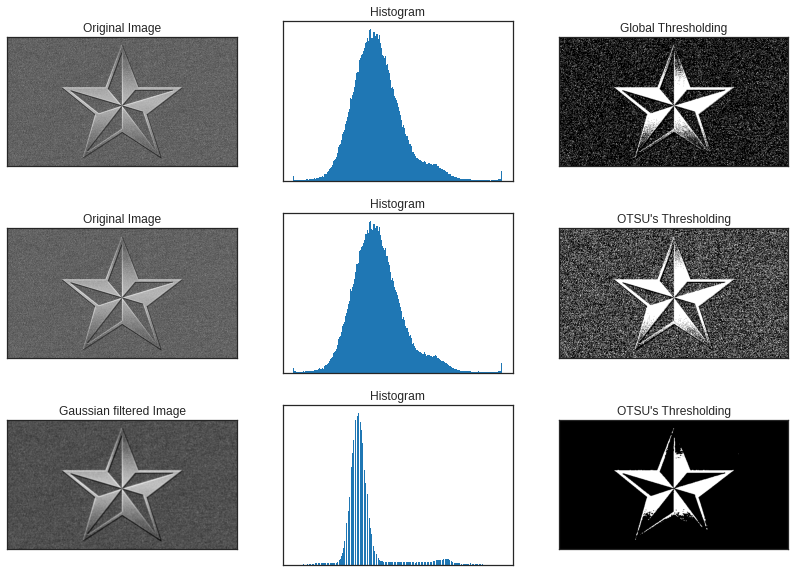

In [53]:
plt.figure(figsize=(14,10))
for i in range(3):
  plt.subplot(3,3, i*3+1)
  plt.imshow(image[i*3], cmap='gray')
  plt.title(titles[i*3])
  plt.xticks([]), plt.yticks([])

  plt.subplot(3,3, i*3+2)
  plt.hist(image[i*3].ravel(), 256)
  plt.title(titles[i*3+1])
  plt.xticks([]), plt.yticks([])

  plt.subplot(3,3, i*3+3)
  plt.imshow(image[i*3+2], cmap='gray')
  plt.title(titles[i*3+2])
  plt.xticks([]), plt.yticks([])

plt.show()